# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [618]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [619]:
pima_df = pd.read_csv('Diabetes.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [620]:
pima_df.sample(n = 10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
325,1,157,72,21,168,25.6,0.123,24,0
689,1,144,82,46,180,46.1,0.335,46,1
126,3,120,70,30,135,42.9,0.452,30,0
759,6,190,92,0,0,35.5,0.278,66,1
294,0,161,50,0,0,21.9,0.254,65,0
208,1,96,64,27,87,33.2,0.289,21,0
38,2,90,68,42,0,38.2,0.503,27,1
719,5,97,76,27,0,35.6,0.378,52,1
620,2,112,86,42,160,38.4,0.246,28,0
45,0,180,66,39,0,42.0,1.893,25,1


In [621]:
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [622]:
pima_df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [623]:
pima_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [624]:
print(pima_df.shape)
pima_df.dtypes

(768, 9)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [625]:
pima_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [626]:
pima_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [627]:
pima_df[~pima_df.applymap(np.isreal).all(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [628]:
pima_df.loc[pima_df['Glucose'] == 0, 'Glucose'] = np.median(pima_df)
pima_df.loc[pima_df['BloodPressure'] == 0, 'BloodPressure'] = np.median(pima_df)
pima_df.loc[pima_df['SkinThickness'] == 0, 'SkinThickness'] = np.median(pima_df)
pima_df.loc[pima_df['Insulin'] == 0, 'Insulin'] = np.median(pima_df)
pima_df.loc[pima_df['BMI'] == 0, 'BMI'] = np.median(pima_df)

# (pima_df['Glucose'] == 0).value_counts()
# (pima_df['BloodPressure'] == 0).value_counts()
# (pima_df['SkinThickness'] == 0).value_counts()
# (pima_df['Insulin'] == 0).value_counts()

# Q5 Print the descriptive statistics of each & every column using describe() function

In [629]:
pima_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.052734,31.428823,24.300,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,70.212891,15.719649,24.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.718880,9.065957,7.000,24.30000,24.3000,32.00000,99.00
Insulin,768.0,91.633073,107.414167,14.000,24.30000,30.5000,127.25000,846.00
BMI,768.0,32.340625,6.943226,18.200,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [630]:
pima_df.groupby(['Outcome']).count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


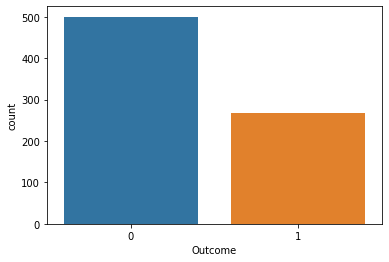

In [631]:
sns.countplot(x = 'Outcome',data = pima_df)

In [632]:
pima_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

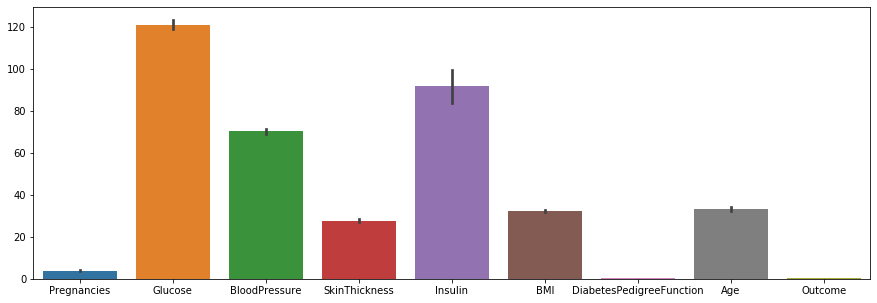

In [665]:
fig, ax = plt.subplots(figsize = (15,5)) 
sns.barplot(data = pima_df)

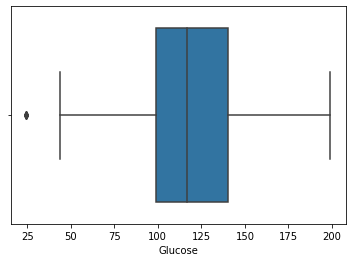

In [634]:
sns.boxplot(x = 'Glucose',data = pima_df)

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

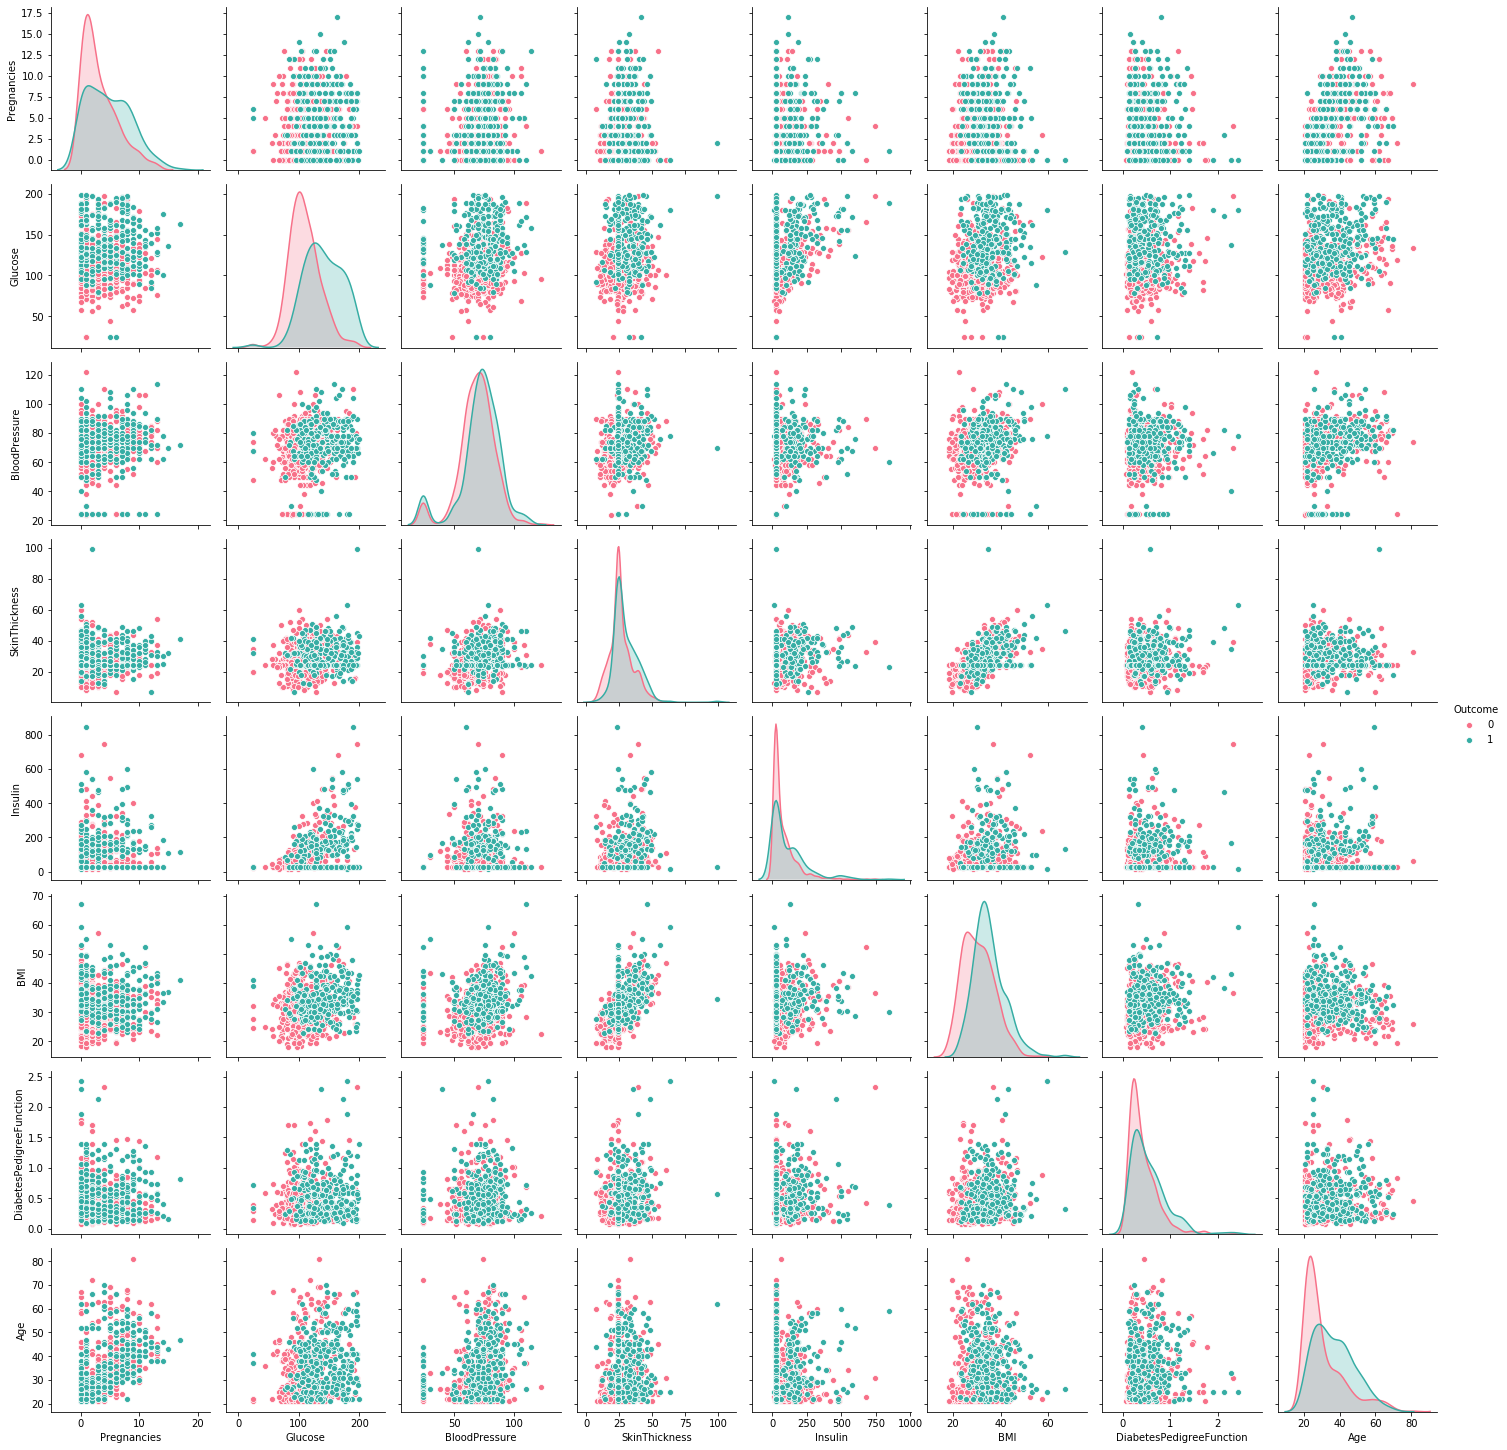

In [635]:
sns.pairplot(pima_df, hue = 'Outcome', palette = 'husl')

In [636]:
pima_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130135,0.169430,0.043151,-0.059642,0.021033,-0.033523,0.544341,0.221898
Glucose,0.130135,1.000000,0.183353,0.168148,0.353277,0.229220,0.138319,0.266085,0.475194
BloodPressure,0.169430,0.183353,1.000000,0.172023,0.061815,0.247344,0.033044,0.279779,0.096120
SkinThickness,0.043151,0.168148,0.172023,1.000000,0.217451,0.551328,0.135483,0.069966,0.195910
Insulin,-0.059642,0.353277,0.061815,0.217451,1.000000,0.195664,0.179738,-0.021262,0.144696
BMI,0.021033,0.229220,0.247344,0.551328,0.195664,1.000000,0.153859,0.029261,0.314771
DiabetesPedigreeFunction,-0.033523,0.138319,0.033044,0.135483,0.179738,0.153859,1.000000,0.033561,0.173844
Age,0.544341,0.266085,0.279779,0.069966,-0.021262,0.029261,0.033561,1.000000,0.238356
Outcome,0.221898,0.475194,0.096120,0.195910,0.144696,0.314771,0.173844,0.238356,1.000000


# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [637]:
X = pima_df.drop(labels = 'Outcome', axis = 1)
y = pima_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3, stratify = y)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [659]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 3, max_depth = 2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [660]:
y_pred = dt.predict(X_test)
print("Training score:-", dt.score(X_train, y_train))
print("Testing Score:-", dt.score(X_test, y_test))

Training score:- 0.7728119180633147
Testing Score:- 0.7445887445887446


In [661]:
confusion_matrix(y_test, y_pred)

array([[127,  23],
       [ 36,  45]], dtype=int64)

Print the feature importance of the decision model - Optional

In [662]:
dt.feature_importances_

array([0.        , 0.62327044, 0.        , 0.        , 0.        ,
       0.20352187, 0.        , 0.17320768])

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [642]:
rm = RandomForestClassifier(n_estimators = 50, random_state = 3, max_depth = 2)
rm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [643]:
y_pred = rm.predict(X_test)
print("Training score:-", rm.score(X_train, y_train))
print("Testing Score:-", rm.score(X_test, y_test))
accuracy_score(y_test, y_pred)

Training score:- 0.7802607076350093
Testing Score:- 0.7489177489177489


0.7489177489177489

In [644]:
confusion_matrix(y_test, y_pred)

array([[140,  10],
       [ 48,  33]], dtype=int64)

In [645]:
rm.feature_importances_

array([0.09655146, 0.45516564, 0.00090906, 0.0316901 , 0.04385455,
       0.15429357, 0.05870732, 0.15882831])

# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [646]:
ab = AdaBoostClassifier(n_estimators = 50, random_state = 3)
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=3)

In [647]:
y_pred = ab.predict(X_test)
print("Training score:-", ab.score(X_train, y_train))
print("Testing Score:-", ab.score(X_test, y_test))
accuracy_score(y_test, y_pred)

Training score:- 0.8435754189944135
Testing Score:- 0.7662337662337663


0.7662337662337663

In [648]:
ab.feature_importances_

array([0.02, 0.22, 0.08, 0.  , 0.06, 0.14, 0.36, 0.12])

# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [649]:
bc = BaggingClassifier(n_estimators = 50, max_samples = 0.50 , oob_score = True , random_state = 3)

In [650]:
bc = bc.fit(X_train, y_train)

In [651]:
y_pred = bc.predict(X_test)
print("Training score:-", bc.score(X_train, y_train))
print("Testing Score:-", bc.score(X_test, y_test))
accuracy_score(y_test, y_pred)

Training score:- 0.962756052141527
Testing Score:- 0.7792207792207793


0.7792207792207793

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [652]:
gb = GradientBoostingClassifier(n_estimators = 50, random_state = 3)
gb = gb.fit(X_train, y_train)

In [653]:
y_pred = gb.predict(X_test)
print("Training score:-", gb.score(X_train, y_train))
print("Testing Score:-", gb.score(X_test, y_test))
accuracy_score(y_test, y_pred)

Training score:- 0.8919925512104283
Testing Score:- 0.7619047619047619


0.7619047619047619

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [654]:
st = StackingClassifier(estimators =[('rf',RandomForestClassifier()),('ad',AdaBoostClassifier()),('bg',BaggingClassifier()),('lr',LogisticRegression())])
# st.fit(X_train, Y_train)
st.fit(X_train, y_train)
y_pred = st.predict(X_test)
print("Training score:-", st.score(X_train, y_train))
print("Testing Score:-", st.score(X_test, y_test))
accuracy_score(y_test, y_pred)

Training score:- 0.931098696461825
Testing Score:- 0.7575757575757576


0.7575757575757576